In [34]:
from tqdm import tqdm_notebook

from string import punctuation

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from pycontractions import Contractions

ModuleNotFoundError: No module named 'pycontractions'

In [ ]:
## Install pycontractions

In [2]:
def getlinks(text):
    return re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)

In [3]:
def gettags(text):
    return re.findall(r"#(\w+)", text)

In [4]:
def getSentLength(text):
    return len(list(sent_tokenize(text)))

In [5]:
def getWordLength(text):
    return len(list(tokenize(text)))

In [6]:
def removelinks(text):
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    return text

In [7]:
def removetags(text):
    text = re.sub(r"#(\w+)", '', text)
    return text

In [8]:
contractions_dict = {
        'didn\'t': 'did not',
        'don\'t': 'do not',
        "aren't": "are not",
        "can't": "cannot",
        "cant": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "didnt": "did not",
        "doesn't": "does not",
        "doesnt": "does not",
        "don't": "do not",
        "dont" : "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he had",
        "he'd've": "he would have",
        "he'll": "he will",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i had",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'm": "i am",
        "I'm":"I am",
        "im": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'll": "it will",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she had",
        "she'd've": "she would have",
        "she'll": "she will",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they had",
        "they'd've": "they would have",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we had",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who's": "who is",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
        }

In [9]:
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

In [10]:
_stopwords = stopwords.words('english') + list(punctuation)

In [11]:
def tokenize(text):
    tokens = [w for w in word_tokenize(expand_contractions(removelinks(text))) if w not in _stopwords]
    return tokens

In [12]:
tqdm_notebook().pandas()

In [13]:
homedir = os.path.dirname(os.path.abspath('__file__'))

In [14]:
homedir

'/home/crayondata.com/sundararaman/Documents/arena/NLP/lingupedia'

In [15]:
datadir = 'data'

In [16]:
trainfile = 'train_2kmZucJ.csv'
testfile = 'test_oJQbWVk.csv'

In [17]:
traindata = pd.read_csv(os.path.join(homedir, datadir, trainfile))
testdata = pd.read_csv(os.path.join(homedir, datadir, testfile))

In [18]:
print("Size of train data: ", traindata.shape)
print("Size of test data: ", testdata.shape)

Size of train data:  (7920, 3)
Size of test data:  (1953, 2)


In [19]:
traindata.iloc[3,2]

"I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/"

In [20]:
sns.countplot(data=traindata, x="label")
plt.show()

<Figure size 640x480 with 1 Axes>

In [21]:
traindata.iloc[1,2]

'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/'

In [22]:
traindata['urls'] = traindata['tweet'].progress_apply(getlinks)

In [23]:
traindata['tags'] = traindata['tweet'].progress_apply(gettags)

In [24]:
traindata['z_tweet'] = traindata['tweet'].progress_apply(removelinks)
traindata['zz_tweet'] = traindata['z_tweet'].progress_apply(removetags)

In [25]:
traindata['sentlen'] = traindata['tweet'].progress_apply(getSentLength)

In [26]:
traindata['tokens'] = traindata['tweet'].progress_apply(tokenize)

In [27]:
traindata.head()

,id,label,tweet,urls,tags,z_tweet,zz_tweet,sentlen,tokens
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,[https://goo.gl/h1MfQV],"[fingerprint, Pregnancy, android, apps, beauti...",#fingerprint #Pregnancy Test #android #apps #...,Test,1,"[fingerprint, Pregnancy, Test, android, apps, ..."
1,2,0,Finally a transparant silicon case ^^ Thanks t...,[http://instagram.com/p/YGEt5JC6JM/],"[yay, Sony, Xperia, S, sonyexperias]",Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...,1,"[Finally, transparant, silicon, case, ^^, Than..."
2,3,0,We love this! Would you go? #talk #makememorie...,[http://fb.me/6N3LsUpCu],"[talk, makememories, unplug, relax, iphone, sm...",We love this! Would you go? #talk #makememorie...,We love this! Would you go? ...,3,"[We, love, Would, go, talk, makememories, unpl..."
3,4,0,I'm wired I know I'm George I was made that wa...,[http://instagr.am/p/Li_5_ujS4k/],"[iphone, cute, daventry, home]",I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...,1,"[I, wired, I, know, I, George, I, made, way, i..."
4,5,1,What amazing service! Apple won't even talk to...,[],[],What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...,2,"[What, amazing, service, Apple, even, talk, qu..."


In [28]:
traindata.tail()

,id,label,tweet,urls,tags,z_tweet,zz_tweet,sentlen,tokens
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...,[https://instagram.com/p/5spiNsJ_c9/],"[lol, liveoutloud, selfie, smile, sony, music,...",Live out loud #lol #liveoutloud #selfie #smile...,Live out loud,1,"[Live, loud, lol, liveoutloud, selfie, smile, ..."
7916,7917,0,We would like to wish you an amazing day! Make...,[],"[tls, today, iphone, accessories, news, life]",We would like to wish you an amazing day! Make...,We would like to wish you an amazing day! Make...,2,"[We, would, like, wish, amazing, day, Make, ev..."
7917,7918,0,Helping my lovely 90 year old neighbor with he...,[],[],Helping my lovely 90 year old neighbor with he...,Helping my lovely 90 year old neighbor with he...,1,"[Helping, lovely, 90, year, old, neighbor, iPa..."
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...,[http://instagr.am/p/U-53G_vJU8/],"[smart, pocket, wifi, ipad, samsung, s3, gadget]",Finally got my #smart #pocket #wifi stay conne...,"Finally got my stay connected anytime,anywh...",2,"[Finally, got, smart, pocket, wifi, stay, conn..."
7919,7920,0,Apple Barcelona!!! #Apple #Store #BCN #Barcelo...,[http://instagram.com/p/wBApVzpCl3/],"[Apple, Store, BCN, Barcelona, travel, iphone,...",Apple Barcelona!!! #Apple #Store #BCN #Barcelo...,Apple Barcelona!!! …,2,"[Apple, Barcelona, Apple, Store, BCN, Barcelon..."


In [29]:
traindata['wlen'] = traindata['tokens'].progress_apply(len)

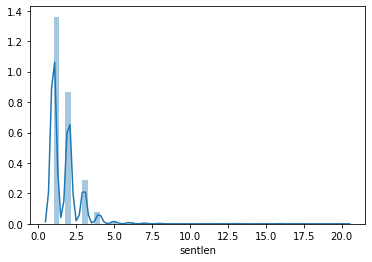

In [30]:
sns.distplot(traindata['sentlen'])

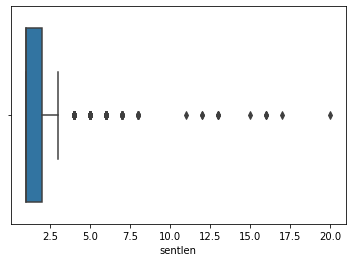

In [31]:
sns.boxplot(traindata['sentlen'])

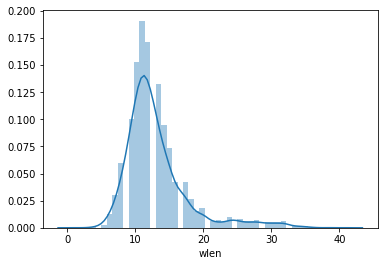

In [32]:
sns.distplot(traindata['wlen'])

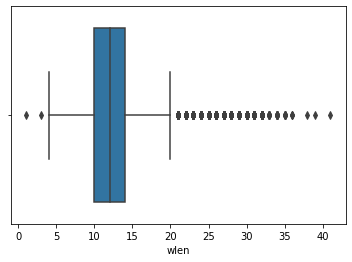

In [33]:
sns.boxplot(traindata['wlen'])